## How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills


## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution by Job Title
Filter our data to only include salary values from the United States.

In [2]:
df_US = df[df['job_location'] == 'United States'].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [5]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer']

In [ ]:
# We don't use unique since we want to keep the order from the most demanded to the least
titles = df_US['job_title_short'].unique().tolist() 

titles

['Data Engineer',
 'Data Scientist',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Data Analyst',
 'Senior Data Analyst',
 'Machine Learning Engineer',
 'Software Engineer',
 'Cloud Engineer',
 'Business Analyst']

In [7]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

df_US_top6.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
339,Data Engineer,Global Market Leading Energy Firm - Staff Data...,United States,via LinkedIn,Full-time,False,"California, United States",2023-09-22 13:07:57,False,False,United States,year,195000.0,NaN,Xcede,None,None
704,Data Engineer,"Data Engineer, Azure",United States,via LinkedIn,Full-time and Contractor,False,"Illinois, United States",2023-10-11 13:07:54,True,False,United States,year,100000.0,NaN,Technical Source,"[sql, python, azure, databricks]","{'cloud': ['azure', 'databricks'], 'programmin..."
813,Data Engineer,Azure Data Engineer,United States,via Dice,Full-time,False,"Florida, United States",2023-02-28 13:14:02,False,True,United States,year,157500.0,NaN,Jobot,"[t-sql, c#, python, sql, azure, github]","{'cloud': ['azure'], 'other': ['github'], 'pro..."
3877,Data Scientist,Data Scientist - 4350,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-05-25 13:03:27,False,False,United States,year,157500.0,NaN,CRI Group,"[r, python, perl]","{'programming': ['r', 'python', 'perl']}"
4375,Data Engineer,BI Data Engineer,United States,via LinkedIn,Full-time,False,"California, United States",2023-08-17 13:08:30,False,False,United States,year,117500.0,NaN,Solü Technology Partners,"[sql, python, snowflake, azure, power bi, sap,...","{'analyst_tools': ['power bi', 'sap'], 'cloud'..."


In [12]:
#Finding the median salary

df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)

job_title_short
Machine Learning Engineer    169250.0
Senior Data Scientist        163000.0
Senior Data Engineer         154000.0
Data Scientist               131280.0
Data Engineer                127500.0
Data Analyst                  89500.0
Name: salary_year_avg, dtype: float64

In [13]:
# Transform it into a DF
df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
df_US_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
339,Data Engineer,Global Market Leading Energy Firm - Staff Data...,United States,via LinkedIn,Full-time,False,"California, United States",2023-09-22 13:07:57,False,False,United States,year,195000.0,NaN,Xcede,None,None
704,Data Engineer,"Data Engineer, Azure",United States,via LinkedIn,Full-time and Contractor,False,"Illinois, United States",2023-10-11 13:07:54,True,False,United States,year,100000.0,NaN,Technical Source,"[sql, python, azure, databricks]","{'cloud': ['azure', 'databricks'], 'programmin..."
813,Data Engineer,Azure Data Engineer,United States,via Dice,Full-time,False,"Florida, United States",2023-02-28 13:14:02,False,True,United States,year,157500.0,NaN,Jobot,"[t-sql, c#, python, sql, azure, github]","{'cloud': ['azure'], 'other': ['github'], 'pro..."
3877,Data Scientist,Data Scientist - 4350,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-05-25 13:03:27,False,False,United States,year,157500.0,NaN,CRI Group,"[r, python, perl]","{'programming': ['r', 'python', 'perl']}"
4375,Data Engineer,BI Data Engineer,United States,via LinkedIn,Full-time,False,"California, United States",2023-08-17 13:08:30,False,False,United States,year,117500.0,NaN,Solü Technology Partners,"[sql, python, snowflake, azure, power bi, sap,...","{'analyst_tools': ['power bi', 'sap'], 'cloud'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773462,Senior Data Scientist,Senior Data Scientist,United States,via Indeed,Full-time,False,Sudan,2023-02-18 02:01:37,False,True,Sudan,year,135000.0,NaN,CVS Health,"[r, python, sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['r'..."
773706,Data Engineer,Data Engineer,United States,via Central Illinois Proud Jobs,Full-time,False,Sudan,2023-03-09 01:51:54,False,True,Sudan,year,105630.5,NaN,Imagine Learning,"[python, sql, c#, vb.net, sql server, snowflak...","{'analyst_tools': ['ssis', 'power bi'], 'cloud..."
781163,Senior Data Engineer,Senior Data Engineer,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-07-08 06:05:47,False,False,United States,year,147500.0,NaN,ZeroFox,"[sql, nosql, elasticsearch, bigquery, snowflak...","{'cloud': ['bigquery', 'snowflake', 'databrick..."
783818,Data Scientist,Associate Data Scientist: Web,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-01-11 07:01:46,False,True,Sudan,year,87307.5,NaN,Rockstar Games,"[javascript, html, css, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


In [14]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

## Plot Salary Distributions
Plot the top 6 job titles salary distributions using a box plot.

C:\Users\HP\AppData\Local\Temp\ipykernel_5792\272645359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order = job_order, palette='Set2',  width=0.5)


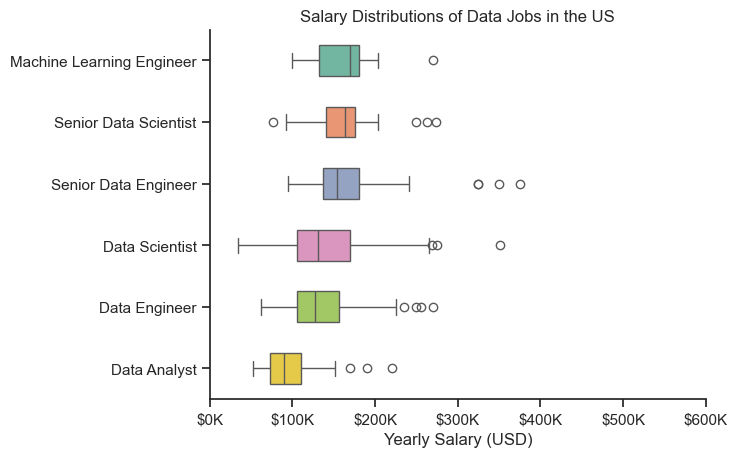

In [18]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order = job_order, palette='Set2',  width=0.5)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame `df_DA_US`. Drop NaN values from the 'salary_year_avg' column. Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the `salary_year_avg` and `job_skills` columns.


In [19]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the df_DA_US. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (df_DA_top_pay) with a reset index and a renamed salary column labeled 'median_salary'.

In [20]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


Calculates the count and median salary for each skill in df_DA_US. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [21]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


Creates two horizontal bar charts: 
1. Displays the highest paid skills 
2. Shows the most in demand skills 

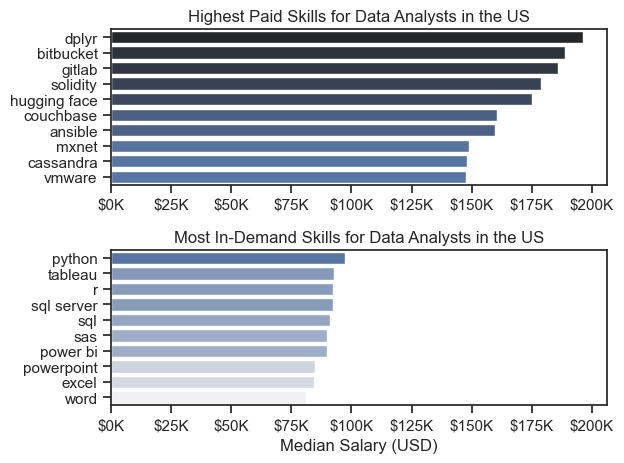

In [23]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()